In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import holidays
from calendar import monthrange

In [53]:
meter = pd.read_excel("BulkMeterData.xlsx")
meter.head()

,DateTime,Power (kW)
0,2018-10-14 00:30:00,10.1980
1,2018-10-14 01:00:00,8.2462
2,2018-10-14 01:30:00,10.1980
3,2018-10-14 02:00:00,12.0000
4,2018-10-14 02:30:00,8.9443


In [54]:
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    17472 non-null  datetime64[ns]
 1   Power (kW)  17416 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.1 KB


### Check missingness

In [55]:
print(meter.isnull().sum(axis=0))
print(sum(meter.isnull().sum(axis=1)!=0)/meter.shape[0])

DateTime       0
Power (kW)    56
dtype: int64
0.003205128205128205


In [56]:
meter.set_index('DateTime', inplace=True)

In [57]:
meter[meter['Power (kW)'].isnull()]

,Power (kW)
DateTime,
2019-01-28 21:00:00,NaN
2019-01-28 21:30:00,NaN
2019-01-28 22:00:00,NaN
2019-01-28 22:30:00,NaN
2019-02-19 08:30:00,NaN
2019-03-14 21:00:00,NaN
2019-03-14 21:30:00,NaN
2019-03-14 22:00:00,NaN
2019-03-16 13:00:00,NaN


### Exploratory Data Analysis

In [58]:
# missing percentage is pretty small, so simple imputer is used
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# meter['Power (kW)'] = imp_mean.fit_transform(meter[['Power (kW)']])

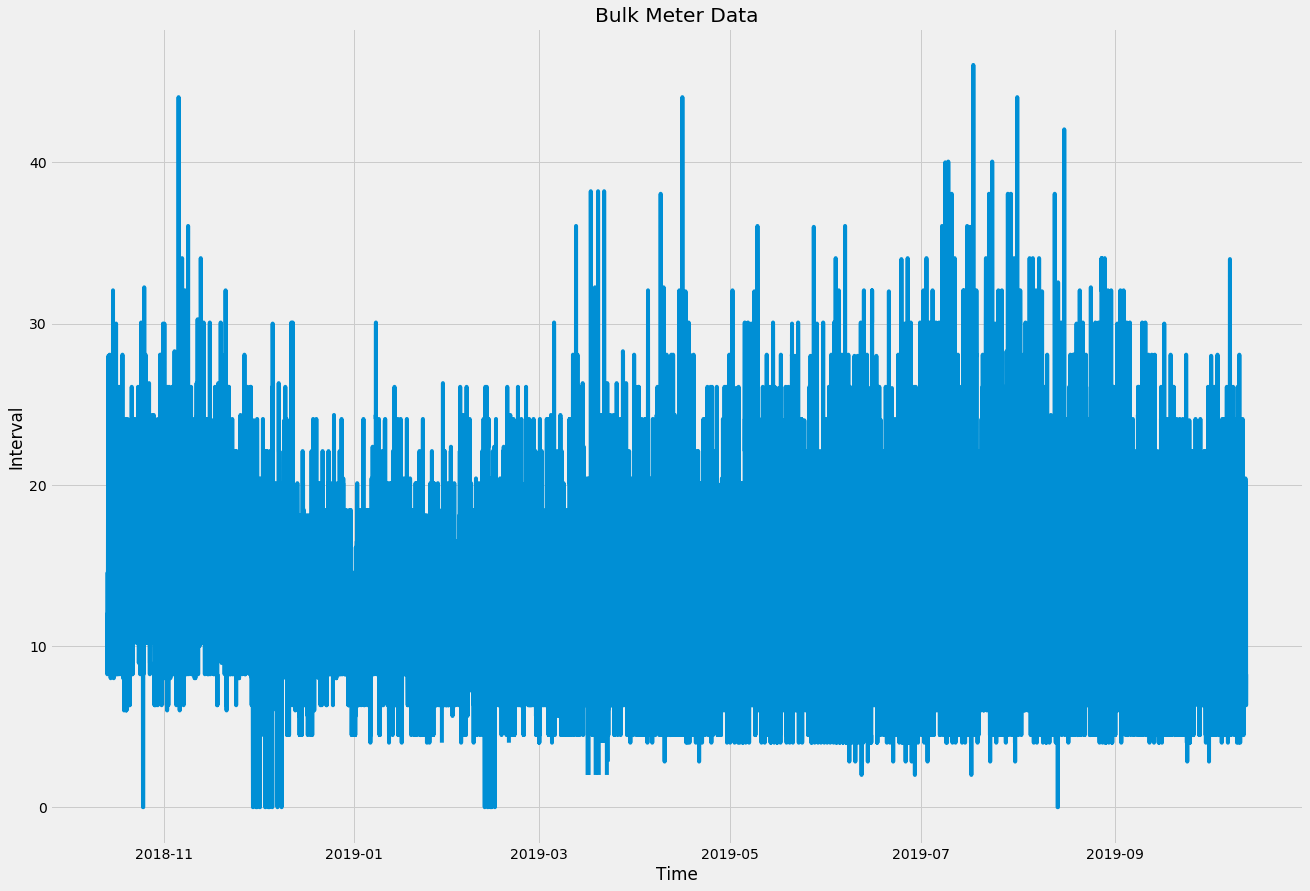

In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 14
plt.style.use('fivethirtyeight')
plt.xlabel("Time")
plt.ylabel("Interval")
plt.title("Bulk Meter Data")
plt.plot(meter)

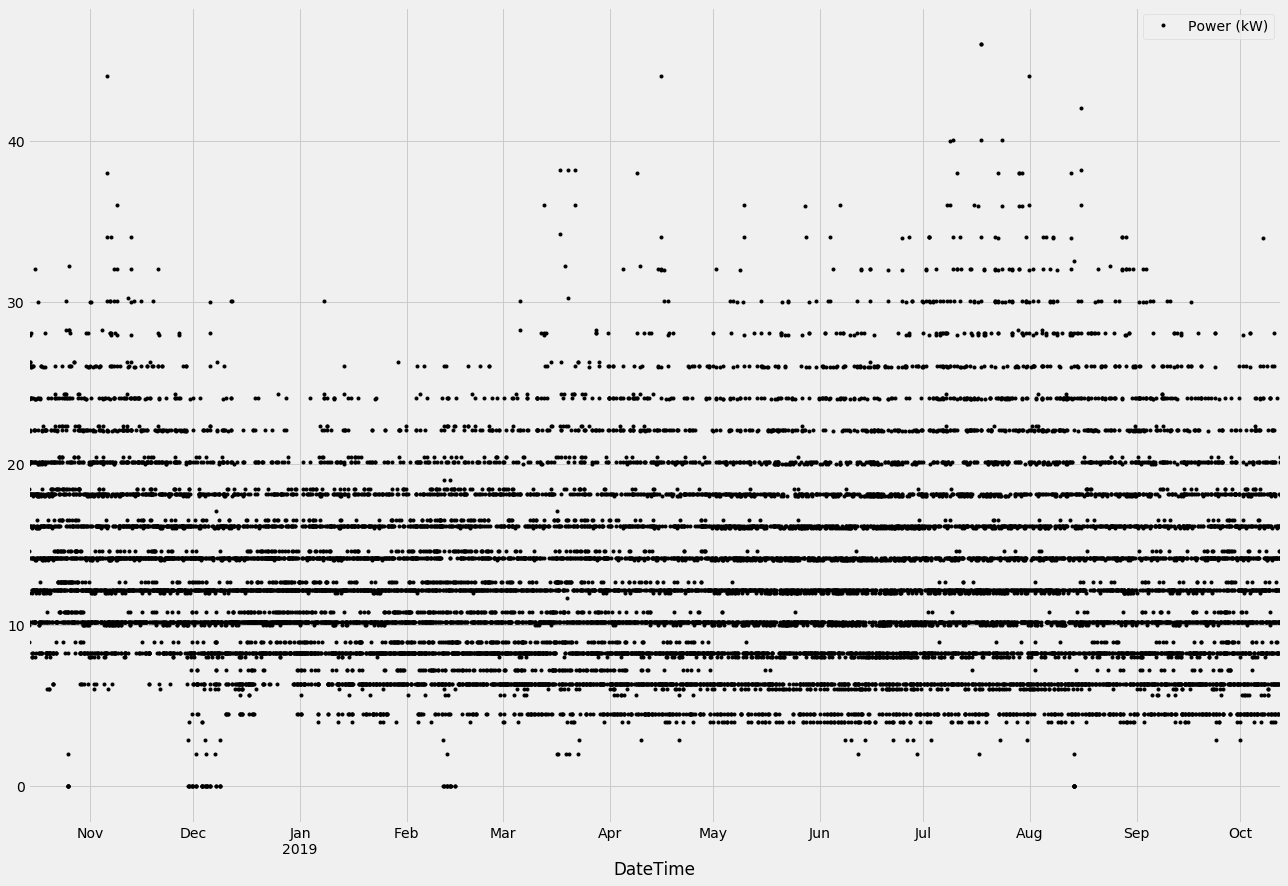

In [60]:
meter.plot(style='k.')
plt.show()

In [61]:
meter.describe()

,Power (kW)
count,17416.000000
mean,13.062078
std,5.805341
min,0.000000
25%,8.246200
50%,12.165500
75%,16.124500
max,46.043500


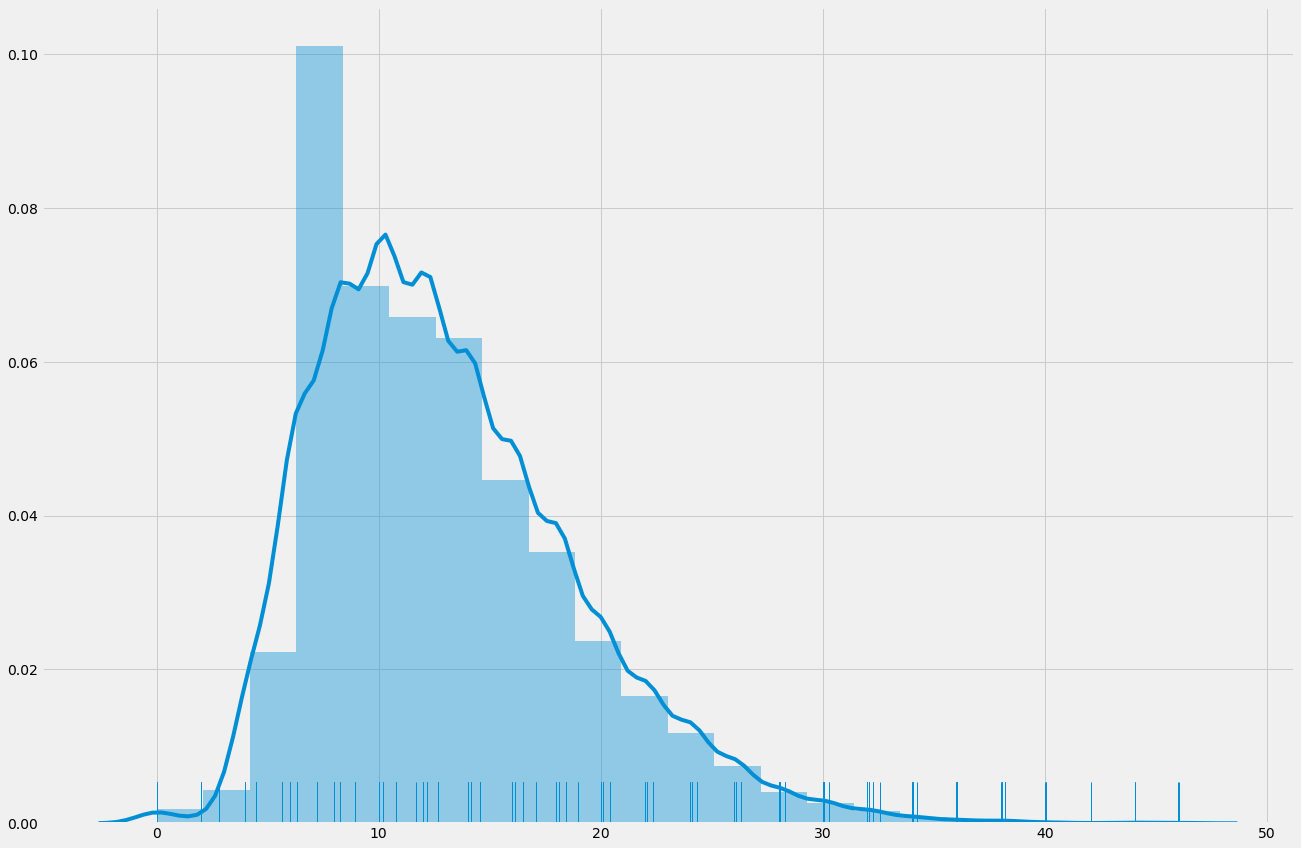

In [62]:
sns.distplot(meter, hist=True, rug=True, bins=22)

### Feature engineering

In [63]:
meter['Date'] = meter.index
meter['Hour'] = meter['Date'].apply(lambda x: x.hour)
meter['Date'] = meter['Date'].apply(lambda x: x.date())

In [64]:
meter.head()

,Power (kW),Date,Hour
DateTime,,,
2018-10-14 00:30:00,10.1980,2018-10-14,0
2018-10-14 01:00:00,8.2462,2018-10-14,1
2018-10-14 01:30:00,10.1980,2018-10-14,1
2018-10-14 02:00:00,12.0000,2018-10-14,2
2018-10-14 02:30:00,8.9443,2018-10-14,2


### Check the longest interval with zero values

In [65]:
temp = meter.groupby(['Date','Hour']).agg('sum')
temp[temp['Power (kW)']==0]

Power (kW)
Date       Hour            
2018-10-25 11           0.0
           12           0.0
2018-11-29 13           0.0
           14           0.0
2018-11-30 14           0.0
2018-12-01 19           0.0
2018-12-03 11           0.0
           12           0.0
2018-12-04 11           0.0
           19           0.0
2018-12-05 17           0.0
2018-12-07 10           0.0
2018-12-08 17           0.0
2019-01-28 21           0.0
           22           0.0
2019-02-11 15           0.0
2019-02-12 15           0.0
2019-02-13 13           0.0
2019-02-14 21           0.0
2019-03-14 21           0.0
2019-03-16 13           0.0
           21           0.0
2019-03-17 11           0.0
           19           0.0
2019-03-18 11           0.0
           19           0.0
2019-03-19 3            0.0
           11           0.0
           19           0.0
2019-03-20 3            0.0
           11           0.0
           19           0.0
2019-03-21 9            0.0
           17           0.0
2019-03-22 17           0.0
2019-03-23 1            0.0
2019-08-13 18           0.0
           19           0.0
           20           0.0

### Replace 0 with a small number to do decomposition

In [66]:
#meter_no_zero = 
meter['Power (kW)'] = meter['Power (kW)'].replace(0,0.001)

In [67]:
meter['Year'] = meter.index
meter['Month'] = meter['Year'].apply(lambda x:x.date().month)
meter['Year'] = meter['Year'].apply(lambda x:x.date().year)

In [68]:
# 2018-10-14 is still included in the training set because missing one inverval is small noise
meter_by_date = meter.groupby(['Date']).count()[['Power (kW)']]
meter_by_date[meter_by_date['Power (kW)']!=48]

,Power (kW)
Date,
2018-10-14,47
2019-01-28,44
2019-02-19,47
2019-03-14,45
2019-03-16,42
2019-03-17,42
2019-03-18,42
2019-03-19,39
2019-03-20,39


### Aggregate by day to perform prediction

In [69]:
meter_by_day = meter.groupby(['Date']).agg({'Power (kW)':['sum']})

In [70]:
meter_by_day.head()

,Power (kW)
,sum
Date,
2018-10-14,884.6910
2018-10-15,767.5694
2018-10-16,767.1694
2018-10-17,734.7718
2018-10-18,759.6314


In [71]:
#meter_by_day = meter_by_day.iloc[:364] # Exclude 10/13/2010

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


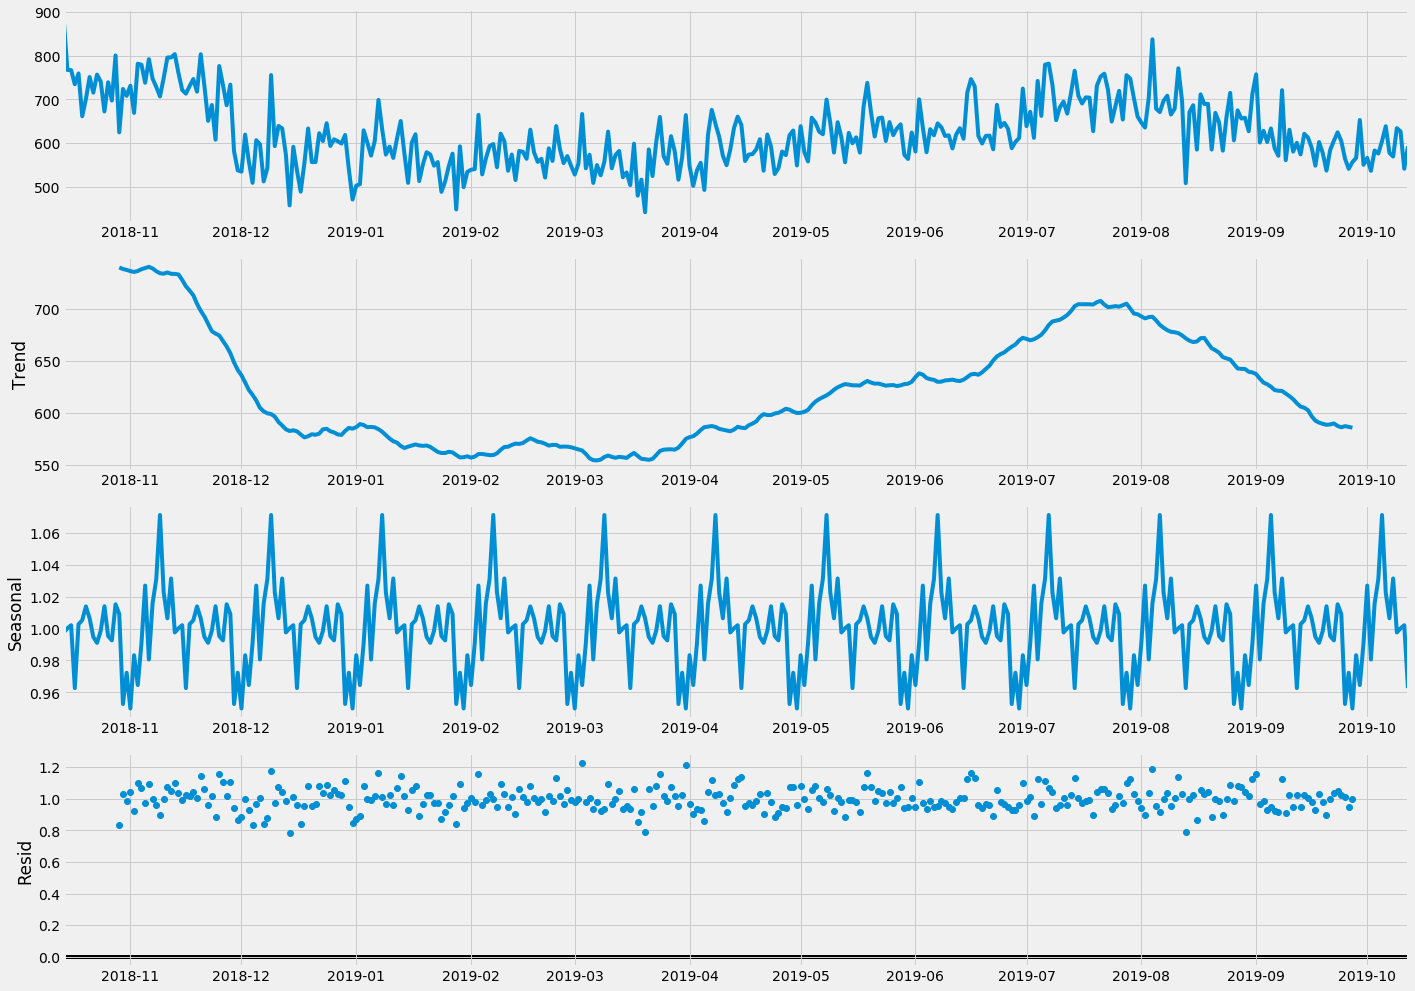

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(meter_by_day[:364], model='multiplicative',freq=30)
result.plot()
plt.show()
#plt.plot(temp.iloc[:364]['Date'],temp.iloc[:364]['Power (kW)'])

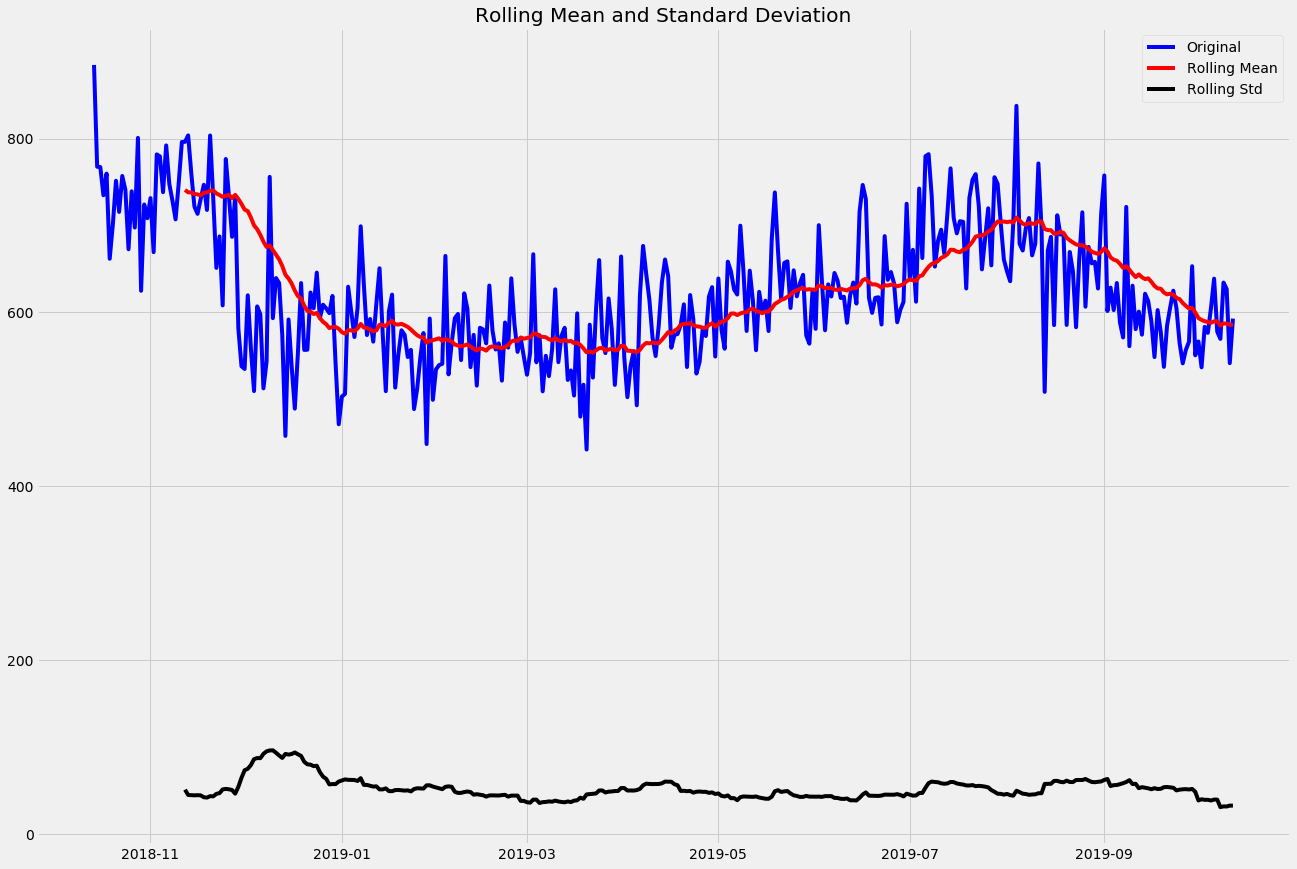

Results of dickey fuller test
Test Statistics                 -2.062001
p-value                          0.260066
No. of lags used                16.000000
Number of observations used    347.000000
critical value (1%)             -3.449337
critical value (5%)             -2.869906
critical value (10%)            -2.571227
dtype: float64


In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Power (kW)'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(meter_by_day[:364])

### Eliminate Trend

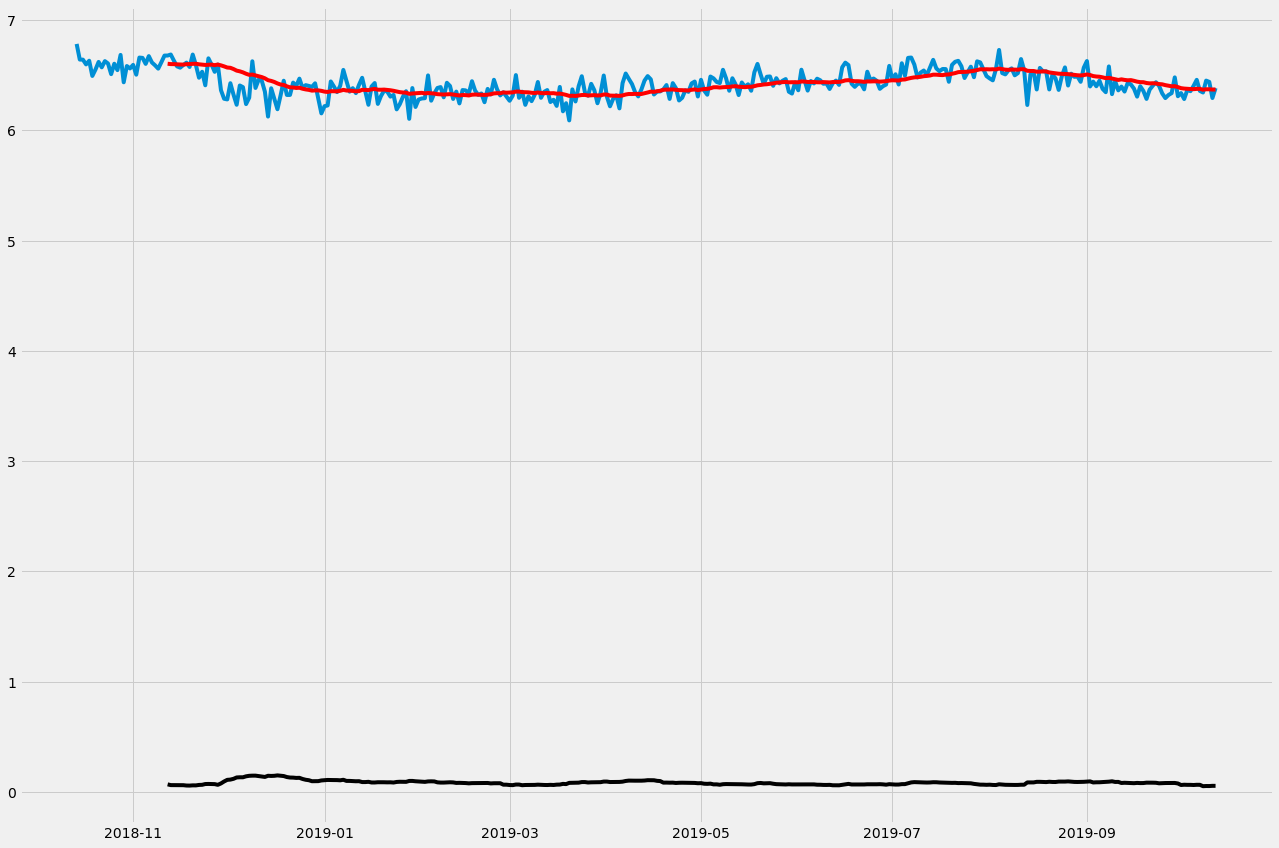

In [74]:
meter_by_day_log = np.log(meter_by_day[:364])
moving_avg = meter_by_day_log.rolling(30).mean()
std_dev = meter_by_day_log.rolling(30).std()
plt.plot(meter_by_day_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

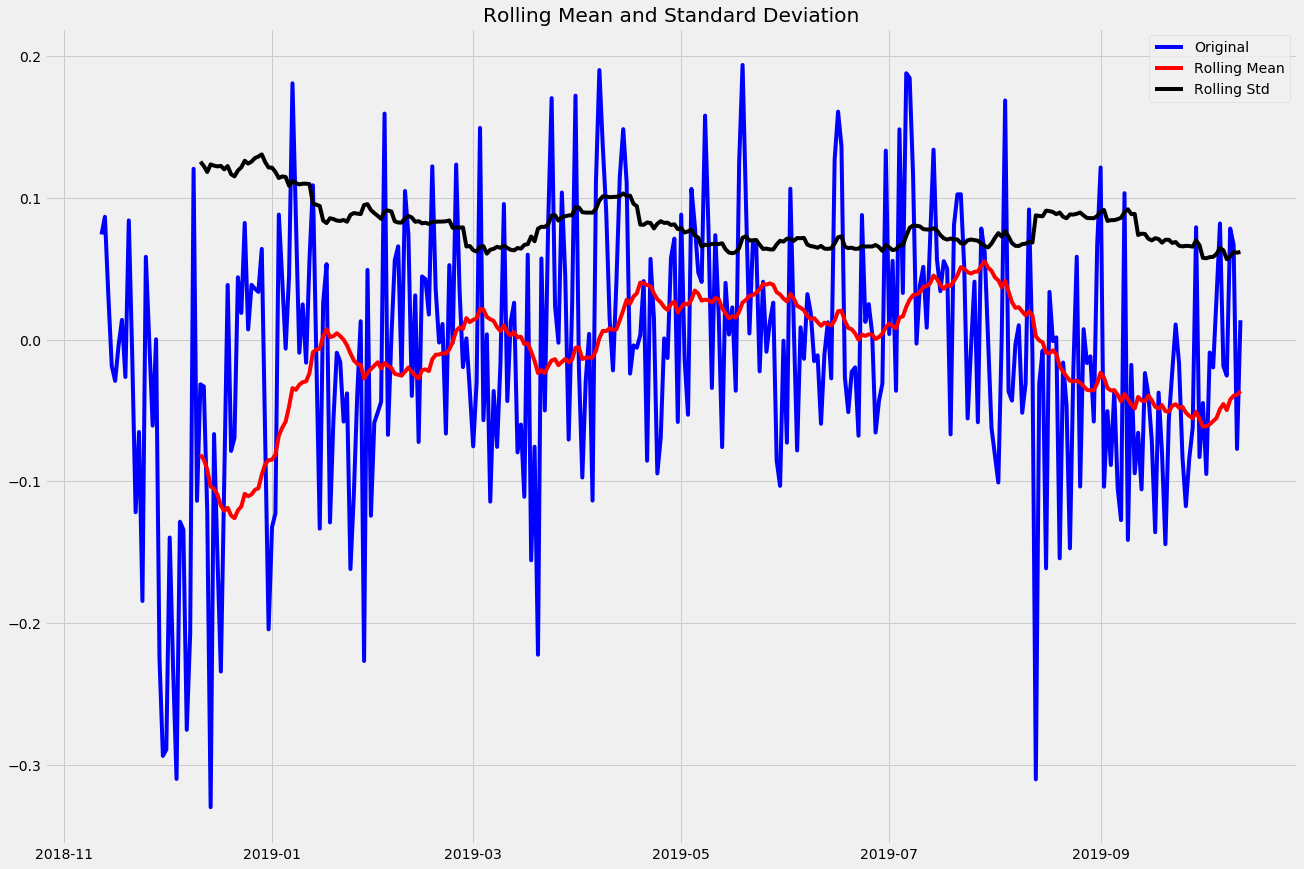

Results of dickey fuller test
Test Statistics                 -3.204864
p-value                          0.019705
No. of lags used                16.000000
Number of observations used    318.000000
critical value (1%)             -3.451082
critical value (5%)             -2.870672
critical value (10%)            -2.571636
dtype: float64


In [75]:
meter_by_day_log_moving_avg_diff = meter_by_day_log-moving_avg
meter_by_day_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(meter_by_day_log_moving_avg_diff)

### Differencing: Eliminate Trend and Seasonality

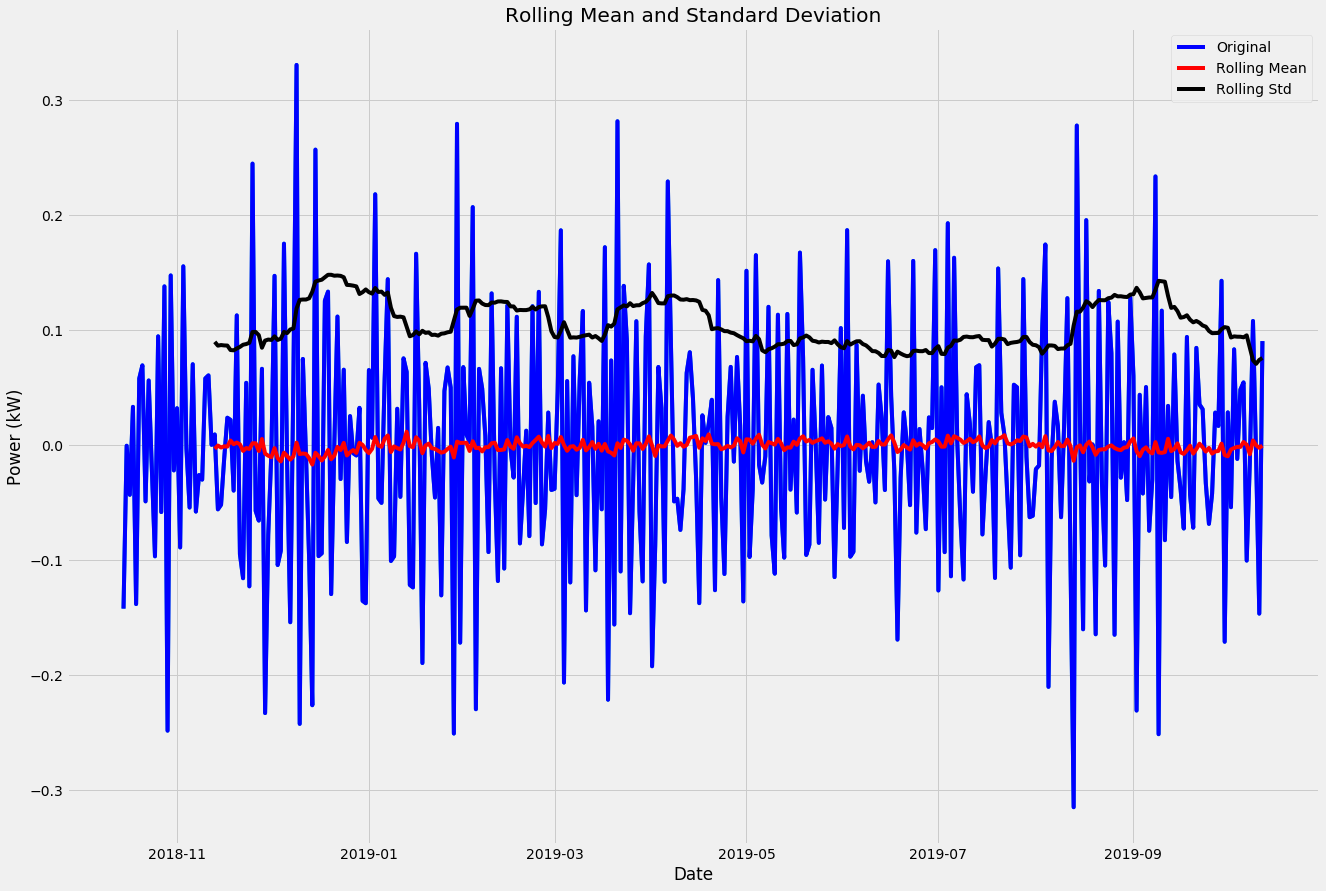

Results of dickey fuller test
Test Statistics                 -5.606209
p-value                          0.000001
No. of lags used                15.000000
Number of observations used    347.000000
critical value (1%)             -3.449337
critical value (5%)             -2.869906
critical value (10%)            -2.571227
dtype: float64


In [76]:
meter_by_day_log_diff = meter_by_day_log - meter_by_day_log.shift(1)
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.plot(meter_by_day_log_diff)
# test the stationarity of our resultant series
meter_by_day_log_diff.dropna(inplace=True)
test_stationarity(meter_by_day_log_diff)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


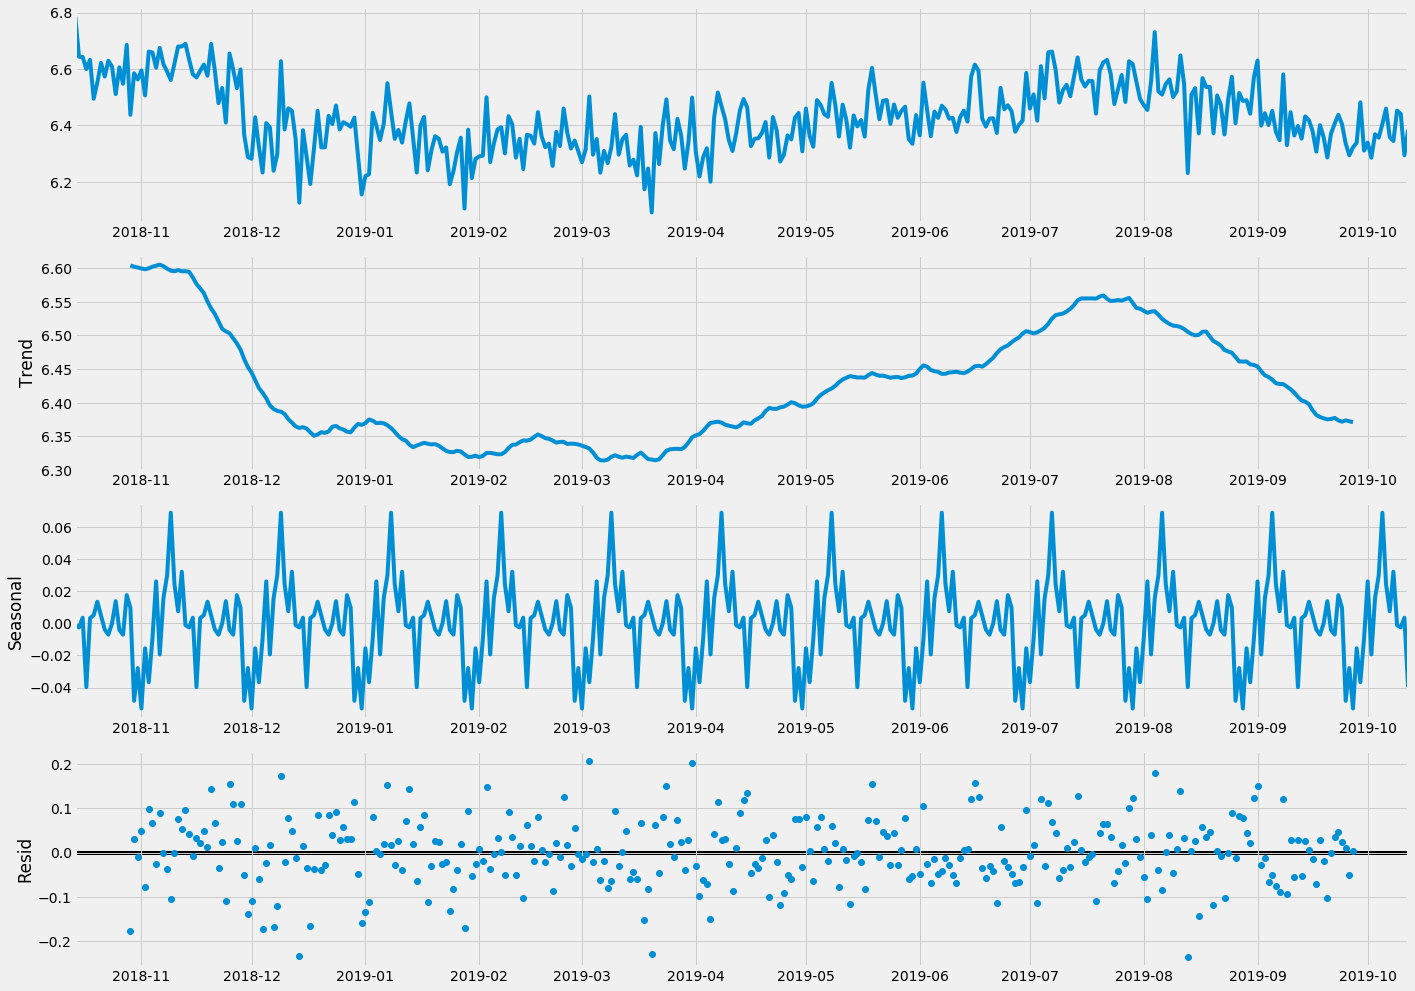

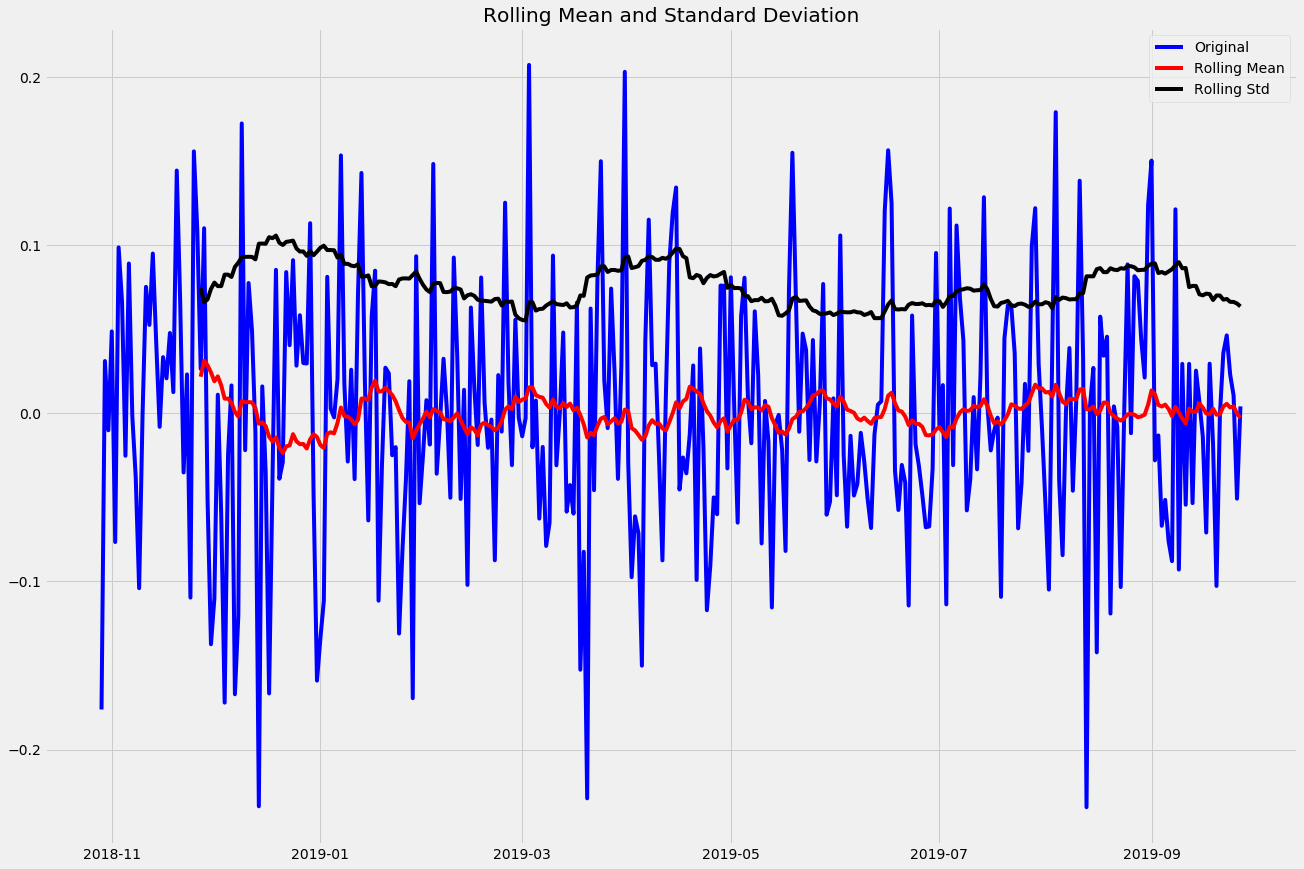

Results of dickey fuller test
Test Statistics               -5.797539e+00
p-value                        4.713530e-07
No. of lags used               1.600000e+01
Number of observations used    3.170000e+02
critical value (1%)           -3.451148e+00
critical value (5%)           -2.870701e+00
critical value (10%)          -2.571651e+00
dtype: float64


In [77]:
result = seasonal_decompose(meter_by_day_log, model='additive', freq = 30)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
residual = residual.to_frame(name='Power (kW)')
test_stationarity(residual)

### Choose parameters p, q for ARIMA model

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


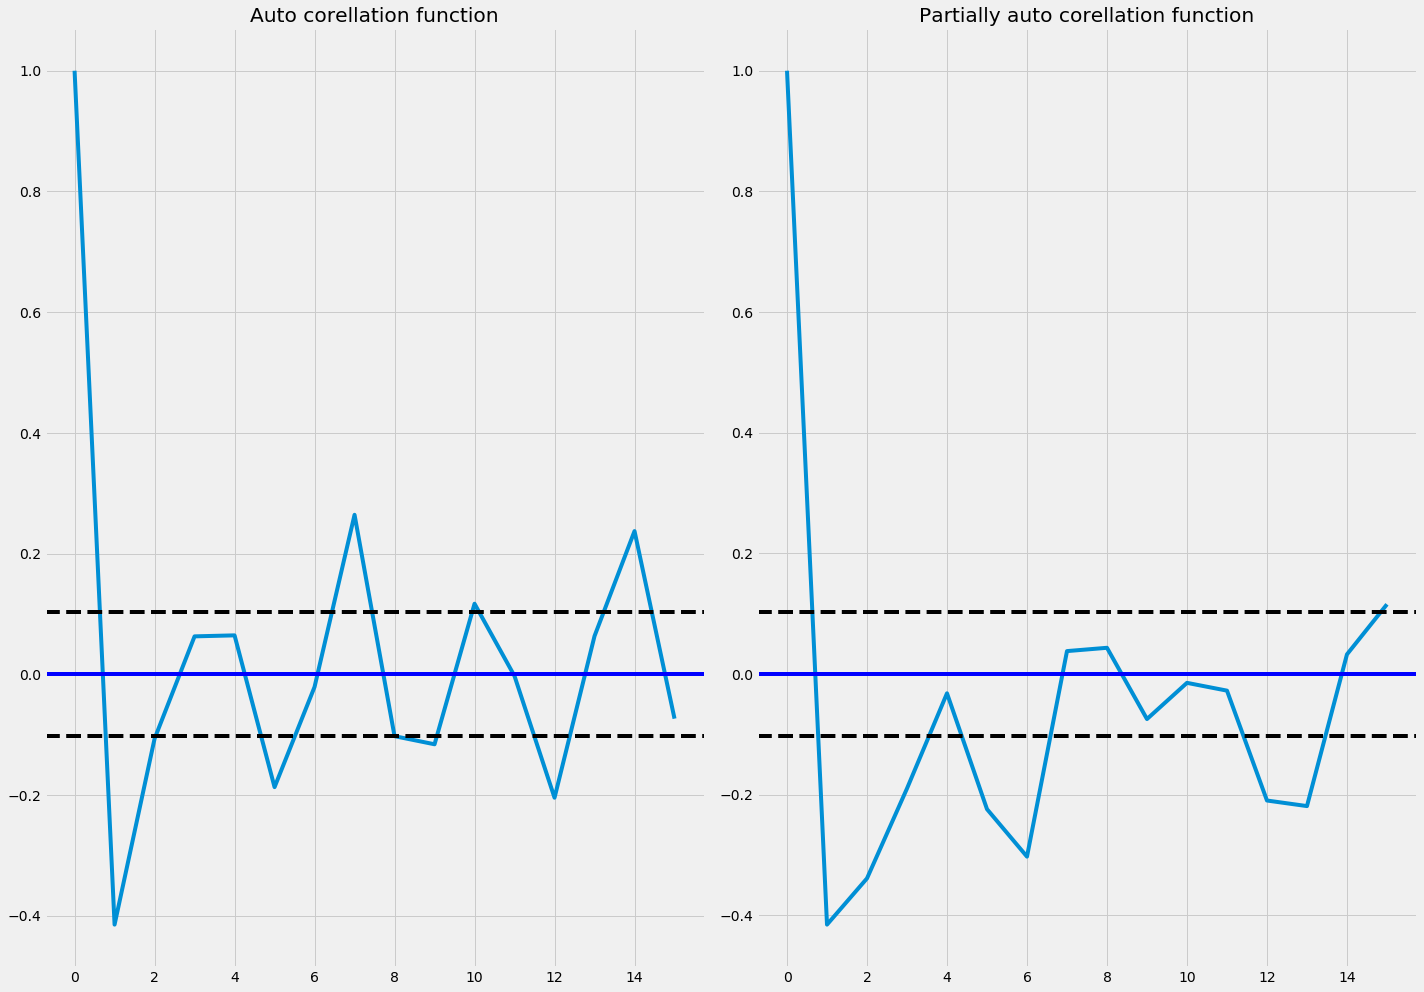

In [78]:
from statsmodels.tsa.stattools import acf,pacf
# use diff value here
acf = acf(meter_by_day_log_diff, nlags=15)
pacf= pacf(meter_by_day_log_diff, nlags=15,method='ols')
#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(meter_by_day_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(meter_by_day_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()
#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(meter_by_day_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(meter_by_day_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RSS : 2.256692


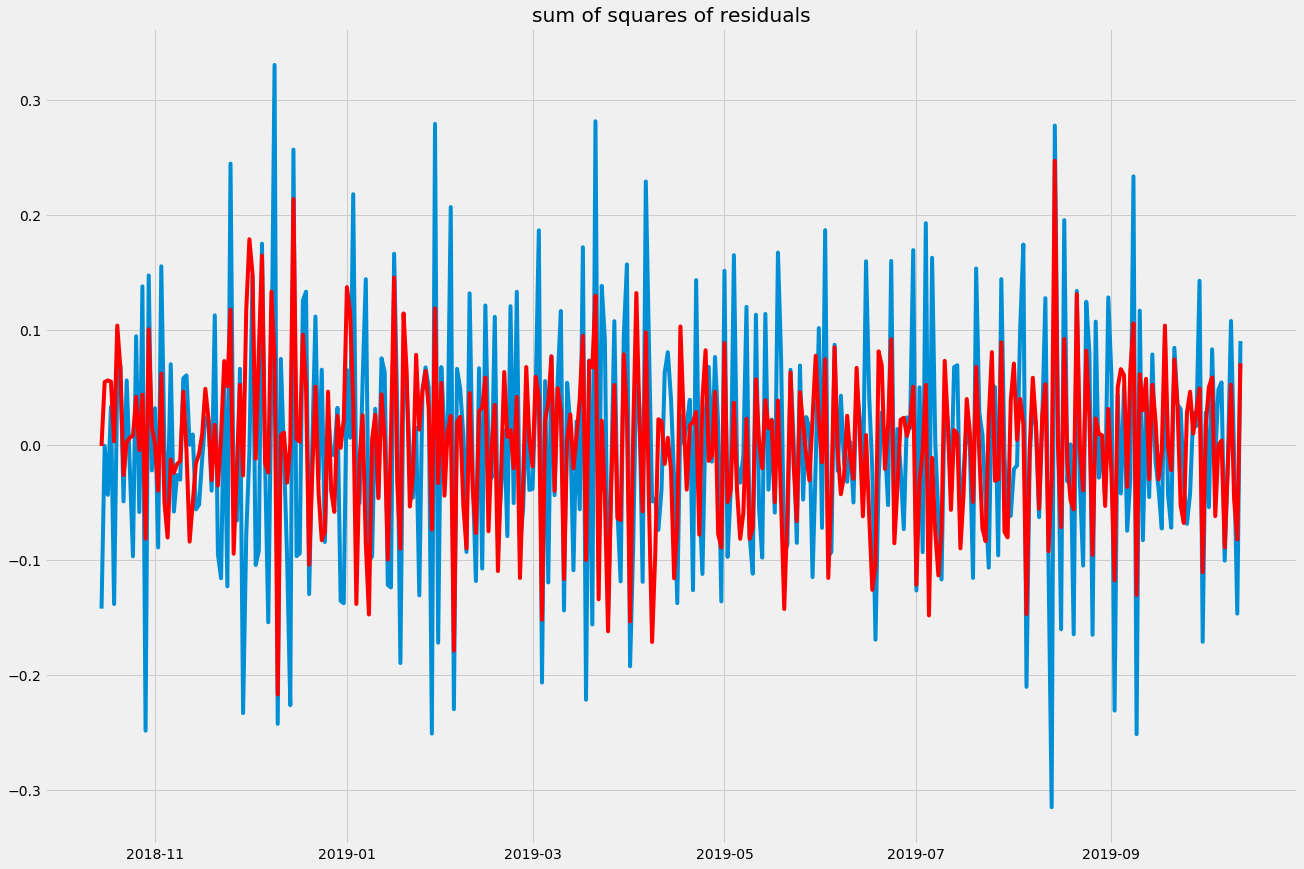

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(meter_by_day_log, order=(3,1,4))
result_AR = model.fit(disp = 0)
plt.plot(meter_by_day_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-meter_by_day_log_diff['Power (kW)']['sum'])**2))

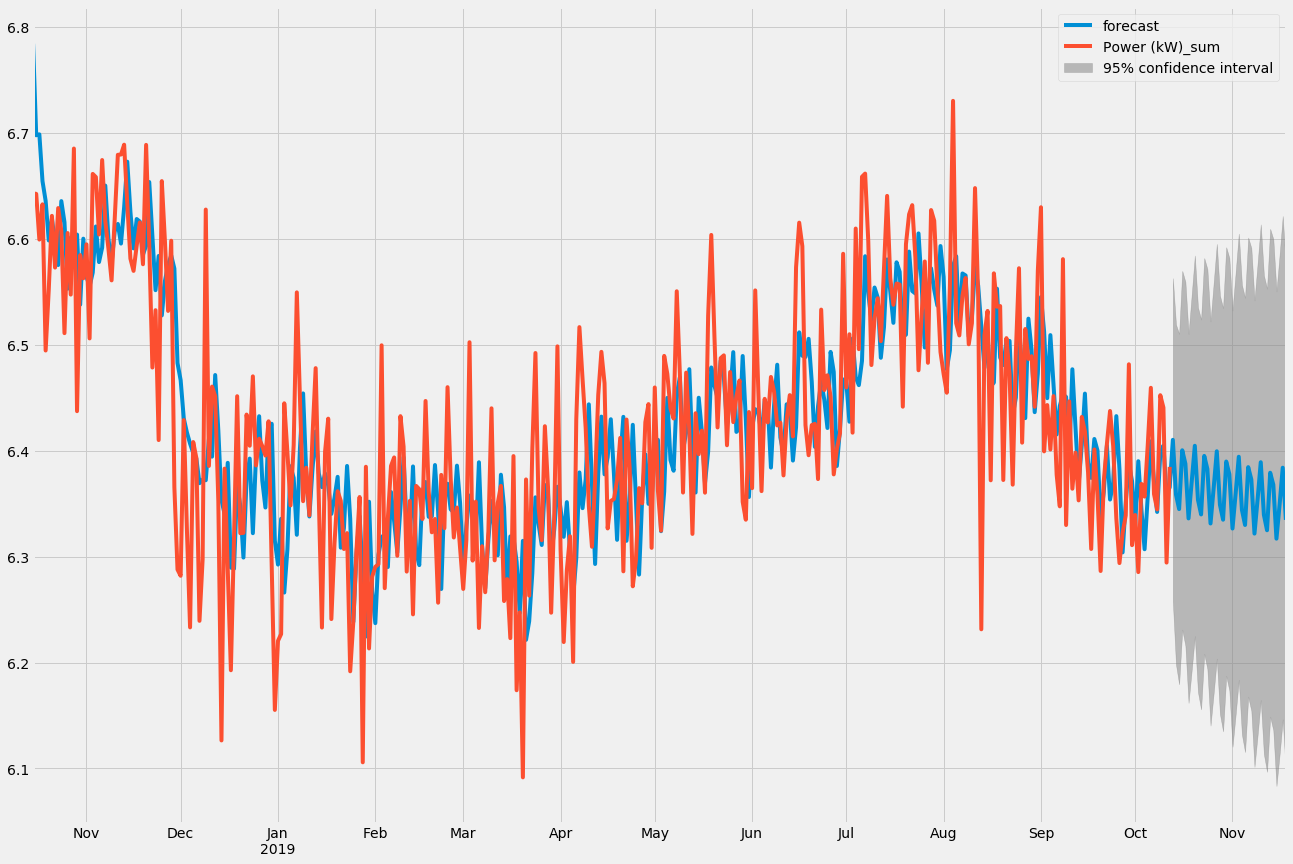

In [80]:
result_AR.plot_predict(1,400)
x=result_AR.forecast(steps=10)

In [81]:
#print(f'lower bound {}'.format(np.exp(x[2][1][0])))
print("Predicted power usage on 10/13/2019:% 5.2f, Lower bound:% 5.2f, Upper bound:% 5.2f" %(np.exp(x[0][1]), np.exp(x[2][1][0]), np.exp(x[2][1][1]))) 

Predicted power usage on 10/13/2019: 577.53, Lower bound: 491.89, Upper bound: 678.09


### Evaluate Model

In [82]:
train = meter_by_day_log[:327]
test = meter_by_day_log[327:]
model = ARIMA(train, order=(3,1,4))
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(38, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=meter_by_day[327:].index)
lower_series = pd.Series(conf[:, 0], index=meter_by_day[327:].index)
upper_series = pd.Series(conf[:, 1], index=meter_by_day[327:].index)

# result_AR = model.fit(disp = 0)
# #plt.plot(meter_by_day_log_diff)
# plt.plot(result_AR.fittedvalues, color='red')
# plt.title("sum of squares of residuals")
# print('RSS : %f' %sum((result_AR.fittedvalues-meter_by_day_log_diff['Power (kW)']['sum'])**2))

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


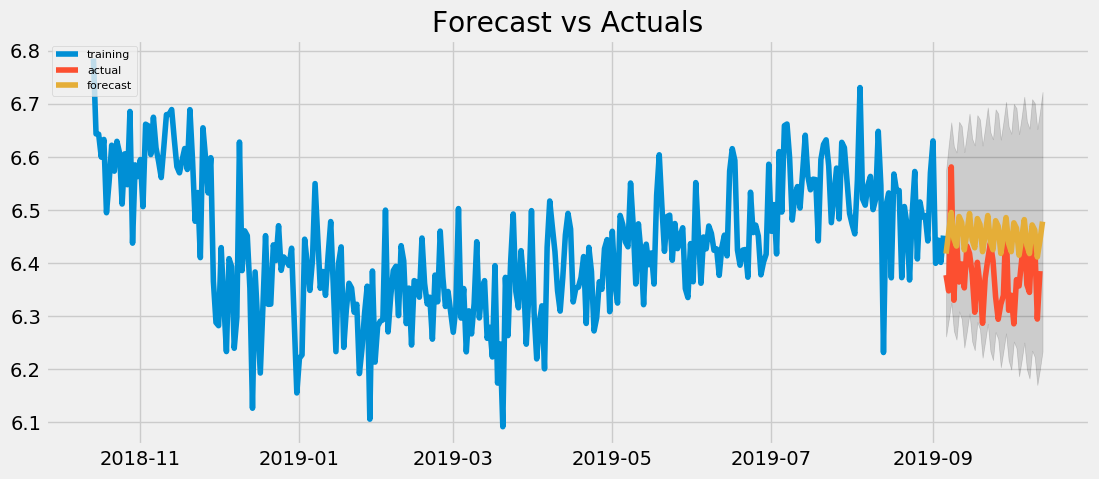

In [83]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [89]:
print("MSE for validation data 9/6/2019 to 10/12/2019:% 5.2f" % (sum((np.exp(fc_series[:37]) - np.exp(meter_by_day_log[327:]['Power (kW)']['sum']))**2)/37))

MSE for validation data 9/6/2019 to 10/12/2019: 3061.92


In [85]:
len(fc_series)

38

In [86]:
np.exp(fc_series[37])

650.6717771845817

In [90]:
meter_by_day

,Power (kW)
,sum
Date,
2018-10-14,884.6910
2018-10-15,767.5694
2018-10-16,767.1694
2018-10-17,734.7718
2018-10-18,759.6314
...,...
2019-10-09,634.3019
2019-10-10,626.9305
